In [1]:
import numpy as np
from scipy import stats

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Concentration Inequalities #

## 1. Markov and Consequences ##

Let $Z$ be a random variable. 

### Markov's Inequality ###

If $Z$ is a nonnegative random variable then, for $t > 0$, 

$$
P(Z \ge t) ~ \le ~ \frac{E(Z)}{t} 
$$

In particular, for $k > 0$,

$$
P(Z \ge k\mu) ~ \le ~ \frac{1}{k}
$$

### Chebyshev's Inequality ###
Apply Markov to $(Z - \mu)^2$:

$$
P(\vert Z - \mu \vert \ge t) ~ = ~ P((Z - \mu)^2 \ge t^2) ~ \le ~ \frac{E(Z - \mu)^2}{t^2} ~ = ~ \frac{\mbox{Var}(Z)}{t^2}
$$

**Example:** Let $Z = \frac{1}{n} \sum_{i=1}^n Z_i$ where $Z_1, Z_2, \ldots, Z_n$ are i.i.d., with mean $\mu$ and standard deviation $\sigma$. Then $E(Z) = \mu$, $\mbox{Var}(Z) = \sigma^2/n$, and

$$
P(\vert Z - \mu \vert \ge t) ~ \le ~ \frac{\sigma^2}{nt^2}
$$

so we have *concentration*:

$$
P(\vert Z - \mu \vert < t) ~ \ge ~ 1 - \frac{\sigma^2}{nt^2} ~ \to 1 ~~ \text{ as } n \to \infty
$$

The distribution of the sample mean $Z$ becomes more and more concentrated around $\mu$ as the sample size increases.

## 2. Higher Moments ##

Similarly for $k = 1, 2, \ldots$,

$$
P(\vert Z - \mu \vert \ge t) ~ = ~ P(\vert Z - \mu \vert^k \ge t^k) ~ = ~ \frac{E(\vert Z - \mu \vert^k)}{t^k}
$$

but the numerator is not easy to calculate.  Also, even if it were easy to calculate, it's not clear which value of $k$ we should choose to get the tightest bound.

Recall from elementary calculus that the exponential function, $e^x$, can be expanded in a Taylor series:

$$
e^z = 1 + z + \frac{1}{2} z^2 + \frac{1}{6} z^3 + \frac{1}{24} z^4 + \cdots,
$$

so if we consider the expectation $E(e^Z)$, we are effectively getting all of the moments, bundled up in 
a particular way:

$$
E(e^Z) = 1 + E(Z) + \frac{1}{2} E(Z^2) + \frac{1}{6} E(Z^3) + \frac{1}{24} E(Z^4) + \cdots,
$$

So it makes sense to consider the *moment generating function* $M_Z$, defined by

$$
M_Z(\lambda ) ~ = ~ E(e^{\lambda Z}),
$$

where the additional parameter $\lambda$ gives us some amount of control over
which particular moments to favor.  Operationally, we simply set $\lambda$ to give us
the tightest bounds.  This is easier than choosing $k$ to give us the tightest bound because
we can use calculus.

- **The mgf and tails**
    - If the $M_Z(\lambda)$ is finite for a positive value of $\lambda$, that tells you the right hand tail of $Z$ is not very heavy.
    - If the $M_Z(\lambda)$ is finite for a negative value of $\lambda$, that tells you the left hand tail of $Z$ is not very heavy.
    - So the mgf is a natural function to consider for tail bounds.

### Chernoff's Inequality ###

For fixed $\lambda \ge 0$, the function $g(z) = e^{\lambda z}$ is an increasing function of $z$. So apply Markov to $e^{\lambda Z}$ for a nonnegative $\lambda$:

$$
P(Z \ge t) ~ = ~ E(e^{\lambda Z} \ge e^{\lambda t}) ~ \le ~
\frac{E(e^{\lambda Z})}{e^{\lambda t}} ~ = ~ \frac{M_Z(\lambda)}{e^{\lambda t}}
$$

This is a family of bounds, one for each positive $\lambda$. To get the best of these bounds, minimize over all nonnegative $\lambda$:

$$
P(Z \ge t) ~ \leq ~ \min_{\lambda \ge 0} \frac{M_Z(\lambda)}{e^{\lambda t}}
$$

## 4. Basic Example: Normal $Z$ ##

Let $Z$ be normal $(\mu, \sigma^2)$. Then $D = Z - \mu$ is normal $(0, \sigma^2)$ and has mgf $M_D(\lambda) = e^{\sigma^2 \lambda^2/2}$. So for $\lambda \ge 0$,

$$
P(Z - \mu > t) ~ \le ~ \exp \big{(} \frac{\sigma^2 \lambda^2}{2} - \lambda t \big{)}
$$

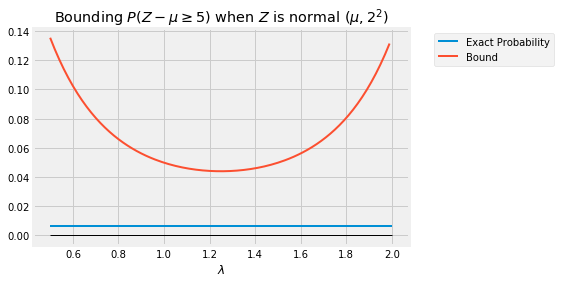

In [5]:
t = 5
sigma = 2

lam_min = 0.5
lam_max = 2
lam = np.arange(lam_min, lam_max, 0.01)

bound = np.exp(0.5*((sigma*lam)**2) - lam*t)
exact = 1 - stats.norm.cdf(t/sigma)

plt.plot([lam_min, lam_max], [exact, exact], lw=2, label = 'Exact Probability')
plt.plot(lam, bound, lw=2, label = 'Bound')
plt.plot([lam_min, lam_max], [0, 0], color='k', lw=1)
plt.legend(bbox_to_anchor=(1.4, 1))
plt.xlabel('$\lambda$')
plt.title('Bounding $P(Z - \mu \geq 5)$ when $Z$ is normal $(\mu, 2^2)$');

The Chernoff bound is 

$$
P(Z - \mu > t) ~ \le ~ \exp \big{(} \frac{\sigma^2 \lambda^2}{2} - \lambda \cdot t \big{)}
$$

We set $\lambda$ by minimizing over the right-hand side, to obtain the tightest bound: $\lambda^* = \text{argmin}_{\lambda \ge 0}  \exp \big{(} \frac{\sigma^2 t^2}{2} - \lambda t \big{)} = \text{argmin}_{\lambda \ge 0} \frac{\sigma^2 t^2}{2} - \lambda t = t/\sigma^2$ by calculus.

Plug in $\lambda^*$ to get the final Chernoff bound

$$
P(Z - \mu > t) ~ \le ~ \exp \big{(} -\frac{t^2}{2\sigma^2} \big{)}
$$

Was it worth the trouble?

### Compare with Chebyshev ###

Because $Z - \mu$ is symmetric about zero, the Chebyshev bound for a single tail is

$$
P(Z - \mu \ge t) ~ \le \frac{\sigma^2}{2t^2}
$$

Compare this with the Chernoff bound as $t$ varies:

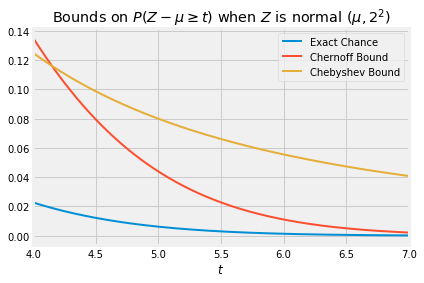

In [3]:
sigma = 2

t_min = 4
t_max = 7
t = np.arange(t_min, t_max + .01, 0.01)

chernoff = np.exp(-0.5*((t/sigma)**2))
chebyshev = 0.5 * ((sigma/t)**2)

plt.plot(t, 1 - stats.norm.cdf(t/sigma), label='Exact Probability', lw=2)
plt.plot(t, chernoff, lw=2, label='Chernoff Bound')
plt.plot(t, chebyshev, lw=2, label='Chebyshev Bound')
plt.xlim(t_min, t_max)
plt.xlabel('$t$')
plt.legend()
plt.title('Bounds on $P(Z - \mu \geq t)$ when $Z$ is normal $(\mu, 2^2)$');

### Concentration ###

Now suppose $Z = \frac{1}{n} \sum_{i=1}^n Z_i$ where $Z_1, Z_2, \ldots, Z_n$ are i.i.d. normal $(\mu, \sigma^2)$.

Then $Z$ is normal $(\mu, \sigma^2/n)$ and the Chernoff bound is

$$
P(Z - \mu > t) ~ \le ~ \exp \big{(} -\frac{nt^2}{2\sigma^2} \big{)}
$$

In this case, the distribution of $Z - \mu$ is symmetric about zero and so 

$$
P(Z - \mu < -t) ~ \le ~ \exp \big{(} -\frac{nt^2}{2\sigma^2} \big{)}
$$

These imply that the distribution of $Z$ is concentrated around $\mu$ when $n$ is large. You knew that already; just note that the new calculation implies this via a new, and simple, line of argument.

## 5. Non-normal $Z$ ##

For $Z$ normal $(\mu, \sigma^2)$, what did we actually use to get the Chernoff bound? 

For $\lambda \ge 0$,

$$
P(Z - \mu > t) ~ \le ~ \frac{M_D(\lambda)}{e^{\lambda t}} ~ = ~
\frac{e^{\sigma^2 \lambda^2/2}}{e^{\lambda t}}
$$

**Key observation:** The inequality 

$$
P(Z - \mu > t) ~ \le ~ 
\frac{e^{\sigma^2 \lambda^2/2}}{e^{\lambda t}}
$$

would still be true for any random variable $Z$ for which $M_D(\lambda) \le e^{\sigma^2 \lambda^2/2}$, and in that case we would have the same Chernoff bound as for normal $Z$, with no further calculation:

$$
P(Z - \mu > t) ~ \le ~ \exp \big{(} -\frac{nt^2}{2\sigma^2} \big{)}
$$

### Important Class of Random Variables ###

A centered (mean zero) random variable $X$ is *sub-Gaussian* if there is some positive constant $C$ such that

$$
M_X(\lambda) ~ \le ~ 
\exp \big{(} \frac{C^2 \lambda^2}{2} \big{)} ~~~ \text{ for all } \lambda
$$

We call this $C^2$-sub-Gaussian.

- **Compare with normal $Z$**
    - If the mgf of $X$ is below that of a centered normal $Z$, that means the tails of $X$ are thinner than those of $Z$.
    - In the bound, $C^2$ is playing the role that $\sigma^2$ had in the normal case. So $C^2$ has to come from the variability in $X$.

The main point is that regardless of the shape of the distribution of $X$, if it is $C^2$-sub-Gaussian then 

$$
P(X \ge t) ~ \le ~ \exp \big{(} -\frac{t^2}{2C^2} \big{)}
$$

Also, by analogous arguments,

$$
P(X \le -t) ~ \le ~ \exp \big{(} -\frac{t^2}{2C^2} \big{)}
$$


### Examples of Sub-Gaussian Random Variables ###

- Clearly, centered normal random variable are sub-Gaussian.

- **Bounded random variables are sub-Gaussian:** This is no surprise as their tails are 0 after a while and therefore thinner than those of a normal. 

    - **Fact:** Let $X$ be centered with possible values in $[a, b]$. We will say that $X$ is "bounded in $[a, b]$". Then for all $\lambda$,
$$
M_X(\lambda) ~ \le ~ \exp \big{(} \frac{(b-a)^2}{8}\lambda^2 \big{)}
$$
Note $C = (b-a)/2$, which is the distance from the center to the edges of the interval $[a, b]$ and is an upper bound on the standard deviation.

## 6. Concentration: Hoeffding Bounds ##

**Fact:** the sum of independent centered $C_i^2$-sub-Gaussian random variables is itself $\sum_{i=1}^n C_i^2$-sub-Gaussian. This is consistent with our understanding of $C_i^2$ as a kind of variance.

**Consequence:** if $Z$ is the average of independent random variables bounded in $[a, b]$, and $E(Z) = \mu$, then

$$
P(Z - \mu \ge t) ~ \le ~ \exp \big{(} - \frac{2nt^2}{(b-a)^2} \big{)}
$$

$$
P(Z - \mu \le -t) ~ \le ~ \exp \big{(} - \frac{2nt^2}{(b-a)^2} \big{)}
$$

An important special case is when $Z$ is the sum of indicators and hence $b - a = 1$. Then

$$
P(Z - \mu \ge t) ~ \le ~ \exp(-2nt^2)
$$

You can use this to find a sample size that guarantees that the tail probability is no more than a fixed level $\delta$:

$$
n ~ \ge ~ \frac{\log(\delta)}{-2t^2} ~ = ~ \frac{\log{1/\delta}}{2t^2}
$$

## 7. Comparison ##

Let $Z$ be a binomial $(n, p)$ proportion, that is, $Z = X/n$ where $X$ has the binomial $(n, p)$ distribution. 

Then $E(Z) = p$ and the Hoeffding bound is

$$
P(Z - p > t) ~ \le ~ \exp(-2nt^2)
$$

Write the event in terms of the count of successes $X$, using $\mu_X$ for the expectation $np$:

$$
P(Z - p \ge t) ~ = ~ P(X - \mu_X \ge nt) ~ = ~ P(X \ge (1+c)\mu_X)
$$

where $c = t/p$. This is a way of writing the chance that $X$ exceeds is mean by a specified percent.

So let's look at $P(X \ge (1+c)np)$ which we can also express as $P(X - np \ge cnp)$. The graphs below are:

- the exact binomial probability $P(X \ge (1+c)np)$
- the Hoeffding bound $\exp(-2nt^2)$ for $t = cp$
- the approximation using the normal $(np, np(1-p))$ distribution

Notice how the normal approximation is sometimes higher and sometimes lower than the exact value. The Hoeffding bound isn't particularly close but it's always above and it has the right decay rate. So you can trust it: if you construct confidence intervals for $p$ using the Hoeffding bounds as the ends, the level of confidence is guaranteed regardless of whether $n$ is large or small.

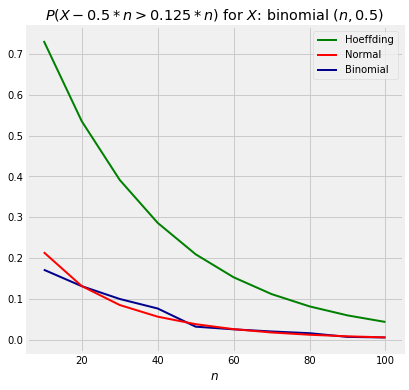

In [4]:
# You can change these parameters
c = 0.25
p = 0.5
n_array = np.arange(10, 101, 10)

# Leave the code alone below this point
t = c*p
exact = np.array([])
normal = np.array([])

for n in n_array:
    mu = n * p
    k = (1+c)*mu
    # if k an integer decrease by 1
    if k == int(k):
        k = (1+c)*mu-1
    exact = np.append(exact, 1 - stats.binom.cdf(k, n, p))
    normal = np.append(normal, 1 - stats.norm.cdf((1+c)*mu, mu, (n*p*(1-p))**0.5))

hoeff = np.exp(-2*n_array*(t**2))

plt.figure(figsize=(6, 6))
plt.plot(n_array, hoeff, color='green', lw=2, label='Hoeffding')
plt.plot(n_array, normal, color='red', lw=2, label='Normal', zorder=3)
plt.plot(n_array, exact, color='darkblue', lw=2, label='Binomial')

plt.legend()
plt.title('$P(X - {0}*n > {1}*n)$ for $X$: binomial $(n, {0})$'.format(p,p*c))
plt.xlabel('$n$');

### More General Form of Hoeffding's Bounds ###

If $Z$ is the average of independent bounded random variables where $Z_i$ is bounded in $[a_i, b_i]$, and $E(Z) = \mu$, then

$$
P(Z - \mu \ge t) ~ \le ~ \exp \big{(} - \frac{2nt^2}{\frac{1}{n} \sum_{i=1}^n(b_i-a_i)^2} \big{)}
$$

$$
P(Z - \mu \le -t) ~ \le ~ \exp \big{(} - \frac{2nt^2}{\frac{1}{n} \sum_{i=1}^n(b_i-a_i)^2} \big{)}
$$
